# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [3]:
url = 'https://estefaniaboutiquesuites.com/en/ecommerce/body-treatments-massages-peelings-tenerife-south-c19.html'

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html')
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=3" name="viewport"/>
<meta content="en" http-equiv="content-language"/>
<title>Body Treatments | Massages and Peelings | Estefanía Boutique Suites Hotel</title>
<meta content="Discover exclusive body treatments in Tenerife South. Relax with massages, peelings and therapies designed to revitalize body and mind. Book now." name="description">
<meta content="index,follow" name="robots">
<meta content="Body Treatments | Massages and Peelings | Estefanía Boutique Suites Hotel" property="og:title">
<meta content="Discover exclusive body treatments in Tenerife South. Relax with massages, peelings and therapies designed to revitalize body and mind. Book now." property="og:description">
<meta content="https://estefaniaboutiquesuites.com/https://estefaniaboutiquesuites.com/cache/img/DSC05292_1500_1500_0_173739181

In [4]:
treatments = soup.find_all('div', class_='item-wrapper')
len(treatments), treatments[0]

(16,
 <div class="item-wrapper">
 <div class="item">
 <a aria-label="Body peeling + Body wraps + 30 min. massage with essential oils" href="https://estefaniaboutiquesuites.com/en/ecommerce/body-peeling-body-wraps-massage-arona-tenerife-south-i30.html">
 <div class="item-image">
 <img alt="Body Peeling + Wraps + Massage with Oils in Arona, Tenerife South | Hotel Estefania Boutique Suites" src="/_images/sites/estefania-boutique-suites1744/catalogue/items/30/envolturas-corporales.png?w=240&amp;h=240&amp;c=1"/>
 </div>
 <div class="item-info">
 <div class="item-name">Body peeling + Body wraps + 30 min. massage with essential oils</div>
 <div class="item-shortdescription"><p>Renew and revitalize your skin with this comprehensive treatment that combines an exfoliating body peel with rejuvenating body wraps.</p></div>
 <div class="item-price">
 <span class="item-price-final">150<span class="cent">,00</span><span class="currency">€</span></span>
 </div>
 </div>
 </a>
 </div>
 </div>)

In [5]:
list_treatments = []
for treatment in treatments:
    treatment_name = treatment.find('div', class_='item-name').text
    price = treatment.find('span', class_='item-price-final').text
    price_string = price[:-1]
    clear_price = price_string.replace(',','.')
    description = treatment.find('div', class_='item-shortdescription').text
    list_treatments.append({'treatment': treatment_name,
                           'price': clear_price,
                           'description': description})
    
list_treatments

[{'treatment': 'Body peeling + Body wraps + 30 min. massage with essential oils',
  'price': '150.00',
  'description': 'Renew and revitalize your skin with this comprehensive treatment that combines an exfoliating body peel with rejuvenating body wraps.'},
 {'treatment': 'Face peeling + Anti-aging mask',
  'price': '100.00',
  'description': 'Revitalize your skin and reduce the signs of aging with our combined facial peel and anti-aging mask treatment.'},
 {'treatment': 'Body Peeling + Relaxing Massage',
  'price': '120.00',
  'description': 'Renew your skin and enjoy a complete relaxation experience with our Body Peeling followed by a 30-minute Relaxing Massage.'},
 {'treatment': 'Body Peeling',
  'price': '90.00',
  'description': 'Revitalize and rejuvenate your skin with our body peel, an exfoliating treatment designed to promote cell regeneration.'},
 {'treatment': 'Lymphatic Drainage',
  'price': '65.00',
  'description': 'Improve your circulation and detoxify your body with our 

In [6]:
df_treatments = pd.DataFrame(list_treatments)
df_treatments['price'] = df_treatments['price'].astype(float)
df_treatments_sorted = df_treatments.sort_values(by='price', ascending=True)
df_treatments_sorted

,treatment,price,description
12,Reiki Treatment,45.0,"Balance your chakras, revitalize your body and..."
6,Special Oil Massage,50.0,"Repair, revitalize, and enjoy a unique sensory..."
10,Head Massage,50.0,Relieve built-up tension and improve concentra...
7,Canary Massage,50.0,Immerse yourself in a unique experience with t...
14,Relax Massage,50.0,Enjoy a traditional wellness experience with o...
9,"Back, Neck and Shoulder Massage",55.0,Relieve tension and improve your posture with ...
11,Revitalizing Foot and Leg Massage,55.0,Revitalize and relieve accumulated tension in ...
13,Foot Reflexology,55.0,Revitalize your body and mind with our Foot Re...
5,Sea Malay Massage (Queen's Massage),65.0,Experience luxury and well-being with our excl...
4,Lymphatic Drainage,65.0,Improve your circulation and detoxify your bod...


In [7]:
conn = sqlite3.connect('treatments_list.db')

In [8]:
df_treatments.to_sql("treatments", conn, if_exists="replace", index=False)
cursor = conn.cursor()

In [9]:
cursor.execute("SELECT COUNT(*) FROM treatments")
print("Rows inserted:", cursor.fetchone()[0])

Rows inserted: 16


In [16]:
cursor.execute('SELECT price FROM treatments ORDER BY price ASC')
rows = cursor.fetchall()
print('Ordered prices:', rows)

Ordered prices: [(45.0,), (50.0,), (50.0,), (50.0,), (50.0,), (55.0,), (55.0,), (55.0,), (65.0,), (65.0,), (65.0,), (70.0,), (90.0,), (100.0,), (120.0,), (150.0,)]


In [ ]:
conn.commit()
conn.close()

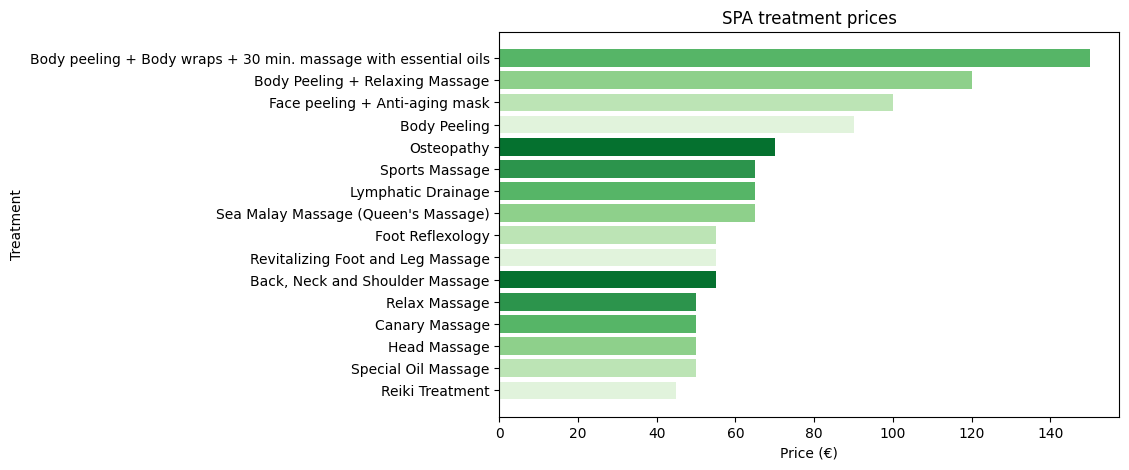

In [ ]:
labels = df_treatments_sorted['treatment']
values = df_treatments_sorted['price']
colours = sns.color_palette('Greens')
plt.figure(figsize= (8, 5))
plt.barh(labels, values, color=colours)
plt.xlabel('Price (€)')
plt.ylabel('Treatment')
plt.title('SPA treatment prices')
plt.show()

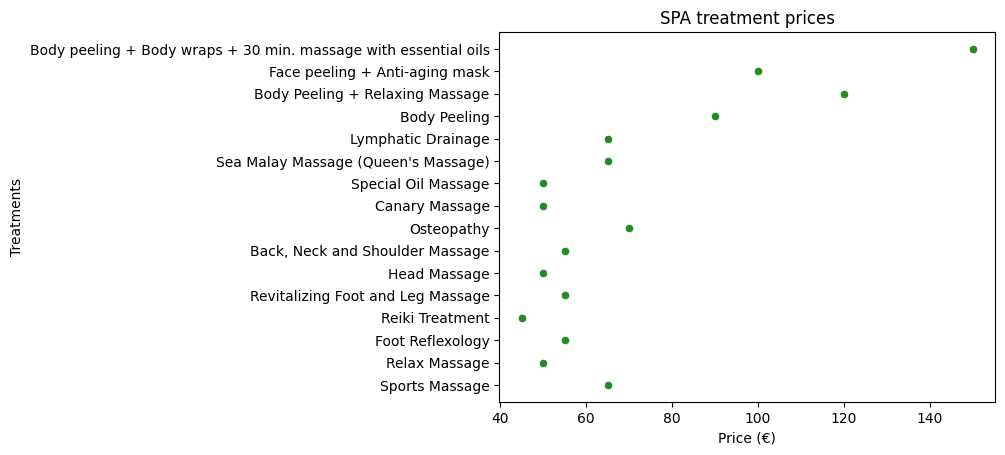

In [ ]:
sns.scatterplot(x='price', y='treatment', data=df_treatments, color='forestgreen')
plt.xlabel('Price (€)')
plt.ylabel('Treatments')
plt.title('SPA treatment prices')
plt.show()
